In [0]:
# load in library we will use later
try:
  from networkx import Graph
except:
  !pip install networkx
  !pip install matplotlib
  from networkx import Graph
  from networkx import draw_networkx as draw

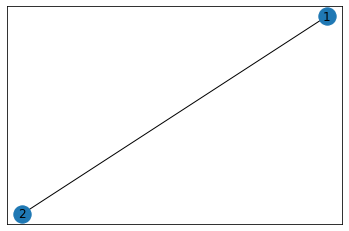

In [8]:
# test graph drawing
from networkx import draw_networkx as draw
G = Graph()
G.add_node(1)
G.add_node(2)
G.add_edge(1, 2)
draw(G)